# Sampling and Confidence Intervals via BarChart and ColorMap

-- Attempting to understand challenges users face when trying to make judgements about probabilistic data generated through samples. 

-- As an example, we take a bar chart of four years of data. Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean.

-- A challenge users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different. One solution is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

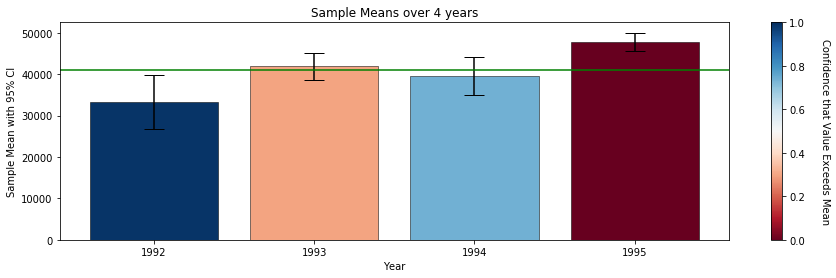

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import scipy.stats as st

# Data set
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# Yearly means
means = df.mean(axis=1)
#print(df.index[0])
#print(means.loc[df.index[0]])

# Yerr = 95% Confidence Interval ; z-value = 1.96
df_std = df.std(axis=1)/np.sqrt(df.shape[1])
y_err = df_std*1.96
#print(y_err)
prob = st.norm.cdf((41000 - means)/(df_std))
#print(prob)

data_x = [1992,1993,1994,1995]
data_height = [means.loc[df.index[0]],means.loc[df.index[1]],means.loc[df.index[2]],means.loc[df.index[3]]]  # Means

# Colors   
my_cmap = plt.get_cmap('RdBu')
colors = cm.RdBu(prob)
fig, ax = plt.subplots(figsize=(15, 4))
rects = ax.bar(data_x, data_height, color=colors, yerr=y_err, capsize=10, linewidth=0.5, edgecolor='black')

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label(label='Confidence that Value Exceeds Mean', rotation=270,labelpad=25)

# Layout
plt.xticks(data_x)    
plt.xlabel('Year')
plt.ylabel('Sample Mean with 95% CI')
plt.title('Sample Means over 4 years')

# Horizonal Line
plt.axhline(y=41000, color='green')
           
# Show graphic
plt.show()
